# Multi model comparison

We often want to compare the result of multiple models. 

**Calibration**. We have several "runs" of the same model with different settings. We would like to find the best. 

**Validation**. We would like to compare our model with alternative models, e.g. a regional DHI model or an external model. 

In this notebook, we will consider several wave models for the Southern North Sea and compare to both point measurements and satellite altimetry data. 


In [1]:
import numpy as np
import modelskill as ms

## Define observations

In [2]:
o1 = ms.PointObservation('data/SW/HKNA_Hm0.dfs0', item=0, x=4.2420, y=52.6887, name="HKNA")
o2 = ms.PointObservation("data/SW/eur_Hm0.dfs0", item=0, x=3.2760, y=51.9990, name="EPL")
o3 = ms.TrackObservation("data/SW/Alti_c2_Dutch.dfs0", item=3, name="c2")

## Define models

In [3]:
mr1 = ms.model_result('data/SW/HKZN_local_2017_DutchCoast.dfsu', name='SW_1', item=0)
mr2 = ms.model_result('data/SW/HKZN_local_2017_DutchCoast_v2.dfsu', name='SW_2', item=0)
mr3 = ms.model_result('data/SW/ERA5_DutchCoast.nc', name='ERA5', item="swh")

In [4]:
##

## Temporal coverage

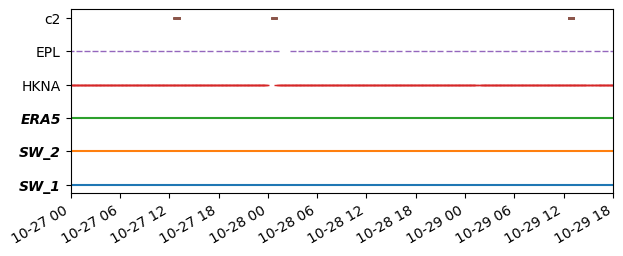

In [5]:
ms.plotting.temporal_coverage([o1, o2, o3], [mr1, mr2, mr3]);

## Match observations and model results

In [8]:
# HKNA is outside ERA5 domain -> pick nearest grid cell
cc = ms.match(obs=[o1, o2, o3], mod=[mr1, mr2, mr3], spatial_method="nearest")
cc

<ComparerCollection>
Comparer: HKNA
Comparer: EPL
Comparer: c2

In [9]:
cc["EPL"]   # select a single comparer from the collection like this

/home/jan/src/book-learn-mikeio-modelskill/.venv/lib/python3.10/site-packages/modelskill/metrics.py:227: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  residual = obs.ravel() - model.ravel()
/home/jan/src/book-learn-mikeio-modelskill/.venv/lib/python3.10/site-packages/modelskill/metrics.py:227: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  residual = obs.ravel() - model.ravel()
/home/jan/src/book-learn-mikeio-modelskill/.venv/lib/python3.10/site-packages/modelskill/metrics.py:227: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  residual = obs.ravel() - model.ravel()


<Comparer>
Quantity: Significant wave height [m]
Observation: EPL, n_points=66
 Model: SW_1, rmse=0.225
 Model: SW_2, rmse=0.234
 Model: ERA5, rmse=0.290

## Perform analysis
You can perform simple filtering on specific `observation` or specific `model`. You can refer to observations and models using their _name_ or _index_. 

The main analysis methods are:
* skill()
* mean_skill()
* scatter()
* taylor()

In [ ]:
cc.skill()

In [ ]:
cc.sel(observation="c2").skill()

In [ ]:
cc.sel(model=0, observation=[0,"c2"]).mean_skill()

In [ ]:
cc.sel(model='SW_1').plot.scatter(cmap='OrRd');

In [ ]:
cc.plot.taylor(normalize_std=True, aggregate_observations=False)

### Time series plot (specifically for point comparisons)
If you select an comparison from the collection which is a PointComparer, you can do a time series plot

In [ ]:
cc['EPL'].plot.timeseries(figsize=(12,4));

## Filtering on time
Use the `start` and `end` arguments to do your analysis on part of the time series

In [ ]:
cc.sel(model="SW_1", end='2017-10-28').skill()

In [ ]:
cc.sel(model='SW_2', start='2017-10-28').plot.scatter(cmap='OrRd', figsize=(6,7));

## Filtering on area
You can do you analysis in a specific `area` by providing a bounding box or a closed polygon

In [ ]:
bbox = np.array([0.5,52.5,5,54])
polygon = np.array([[6,51],[0,55],[0,51],[6,51]])

In [ ]:
cc.sel(model="SW_1", area=bbox).skill()

In [ ]:
cc.sel(model="SW_2", area=polygon).plot.scatter();

## Skill object

The skill() and mean_skill() methods return a skill object that can visualize results in various ways. The primary methods of the skill object are:

* style()
* plot_bar()
* plot_barh()
* plot_line()
* plot_grid()
* sel()

In [ ]:
s = cc.skill()

In [ ]:
s.style()

In [ ]:
s.style(columns='rmse')

In [ ]:
s['rmse'].plot.bar();
s['rmse'].plot.barh();  # horizontal version

In [ ]:
s = cc.skill(by=['model','freq:12H'], metrics=['bias','rmse','si'])

In [ ]:
s.style()

In [ ]:
s['rmse'].plot.line(title='Hm0 rmse [m]');

In [ ]:
s.plot.grid('si', fmt='0.1%', title='Hm0 Scatter index');

### The sel() method can subset the skill object 

A new skill object will be returned

In [ ]:
s = cc.skill()
s.style()

In [ ]:
s.sel(model='SW_1').style()

In [ ]:
s.sel(observation='HKNA').style()

In [ ]:
s.query('rmse>0.25').style()